In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make charts look nice
plt.style.use('ggplot')

# Load the dataset
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

# Display the first 5 rows
data.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
# Step 1: Get basic info about dataset
data.info()

# Step 2: Check if there are any missing values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Step 3: Get basic statistics
print("\nStatistical summary:\n")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB

Missing values in each column:

Customer ID                 0
Gender                      0
Age            

In [6]:
# See total rows and columns
print("Shape of dataset:", data.shape)

# See all column names
print("\nColumn names:\n", data.columns.tolist())


Shape of dataset: (350, 11)

Column names:
 ['Customer ID', 'Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']


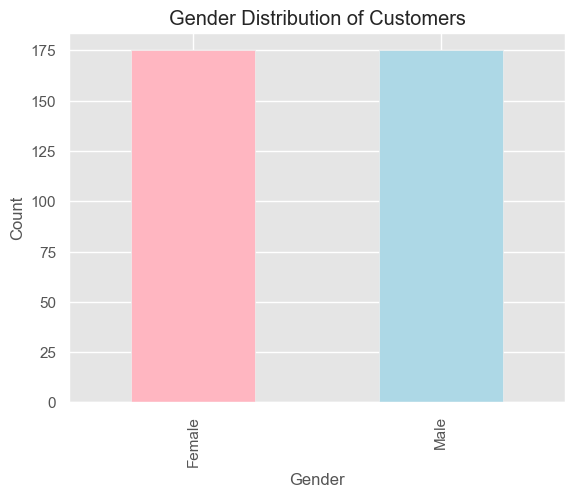

In [7]:
# Gender distribution
data['Gender'].value_counts().plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\2176395700.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Membership Type', data=data, palette='pastel')


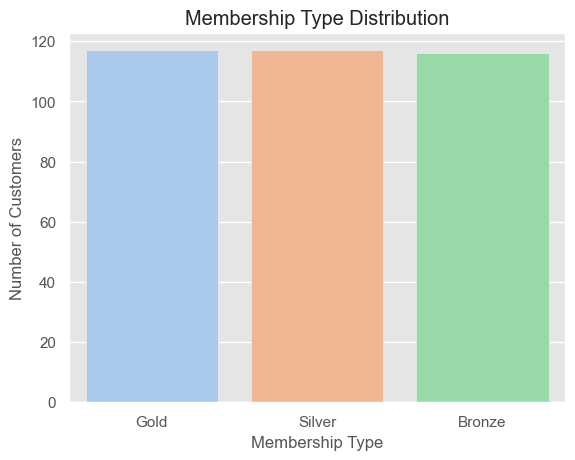

In [8]:
sns.countplot(x='Membership Type', data=data, palette='pastel')
plt.title("Membership Type Distribution")
plt.xlabel("Membership Type")
plt.ylabel("Number of Customers")
plt.show()


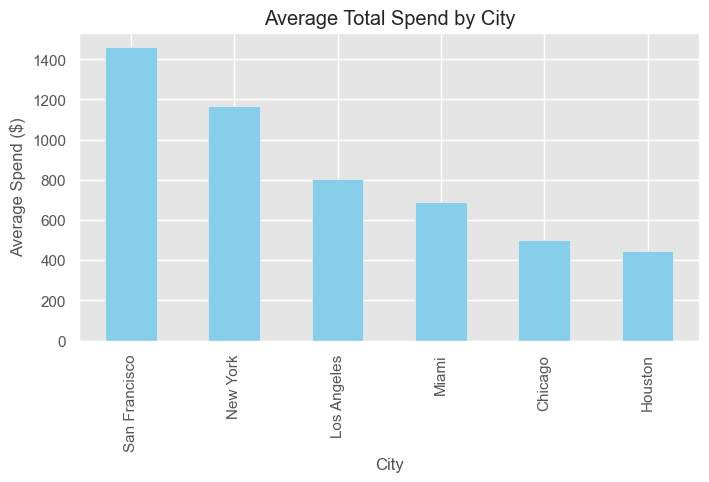

In [9]:
city_spend = data.groupby('City')['Total Spend'].mean().sort_values(ascending=False)

city_spend.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Average Total Spend by City")
plt.xlabel("City")
plt.ylabel("Average Spend ($)")
plt.show()


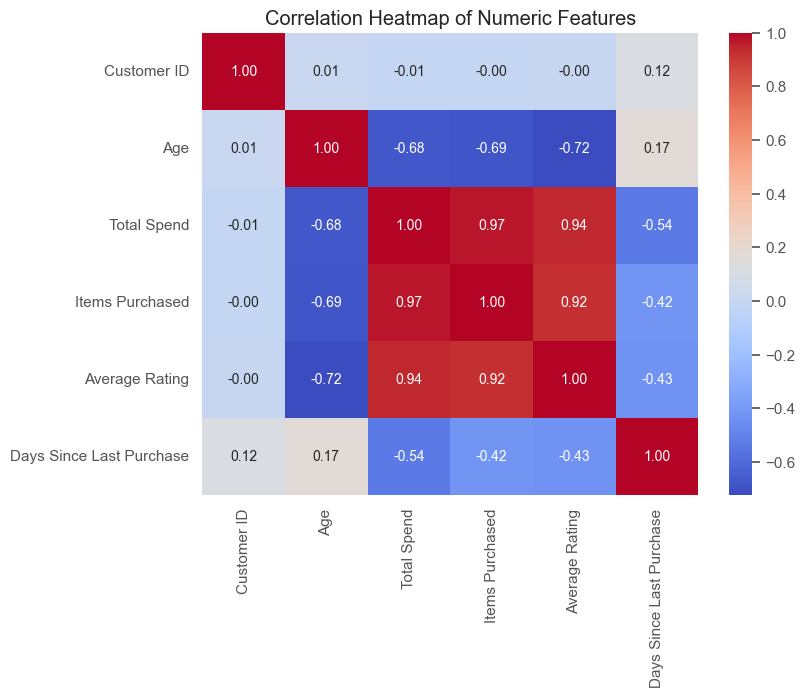

In [10]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


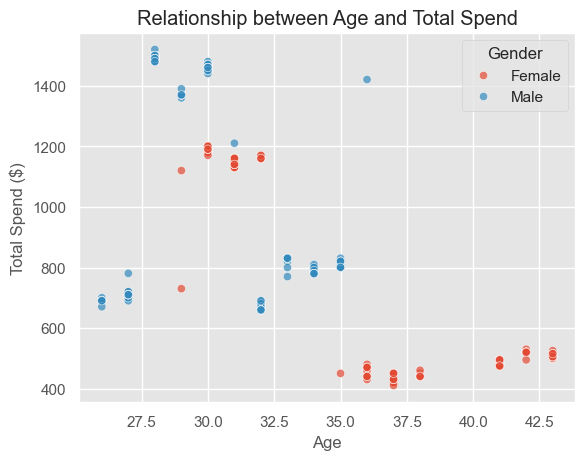

In [11]:
sns.scatterplot(x='Age', y='Total Spend', data=data, hue='Gender', alpha=0.7)
plt.title("Relationship between Age and Total Spend")
plt.xlabel("Age")
plt.ylabel("Total Spend ($)")
plt.show()


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\1931665899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Membership Type', y='Satisfaction Level', data=data, palette='Set2')


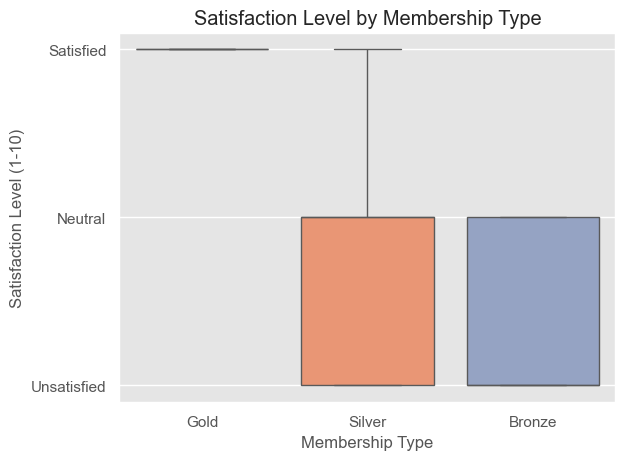

In [12]:
sns.boxplot(x='Membership Type', y='Satisfaction Level', data=data, palette='Set2')
plt.title("Satisfaction Level by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Satisfaction Level (1-10)")
plt.show()


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\1404394407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Applied', y='Total Spend', data=data, palette='cool')


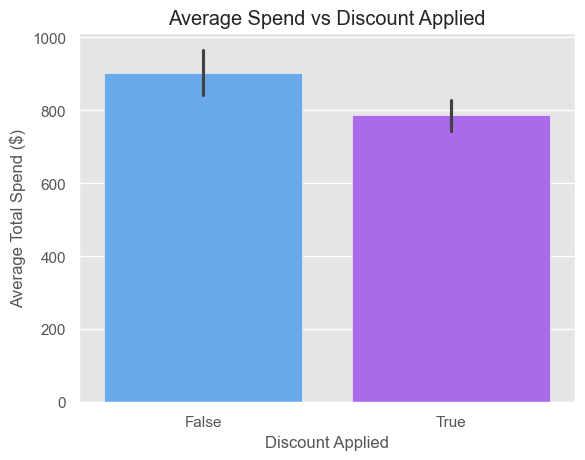

In [13]:
sns.barplot(x='Discount Applied', y='Total Spend', data=data, palette='cool')
plt.title("Average Spend vs Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Average Total Spend ($)")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
# Make a copy of data
df = data.copy()

# Convert categorical columns using pd.get_dummies (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# View first few rows
df.head()


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,101,29,1120.20,14,4.6,True,25,False,False,False,False,True,False,True,False,True,False
1,102,34,780.50,11,4.1,False,18,True,False,True,False,False,False,False,True,False,False
2,103,43,510.75,9,3.4,True,42,False,False,False,False,False,False,False,False,False,True
3,104,30,1480.30,19,4.7,False,12,True,False,False,False,False,True,True,False,True,False
4,105,27,720.40,13,4.0,True,55,True,False,False,True,False,False,False,True,False,True


In [16]:
# Target (what we want to predict)
y = df['Total Spend']

# Features (what we use to predict)
X = df.drop(['Total Spend'], axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (280, 16)
Testing set: (70, 16)


In [17]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)


,Actual,Predicted
157,810.90,819.658974
341,1140.60,1146.169037
315,710.40,701.786239
234,830.75,831.767070
155,430.80,433.551387
274,470.50,458.713200
304,430.80,427.503629
227,1140.60,1157.117119
278,1450.50,1436.213262
185,430.80,434.065481


In [19]:
# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared Score:", round(r2, 2))


Model Evaluation Metrics:
Mean Absolute Error (MAE): 11.3
Mean Squared Error (MSE): 251.84
R-squared Score: 1.0


In [22]:
df.columns


Index(['Customer ID', 'Age', 'Total Spend', 'Items Purchased',
       'Average Rating', 'Discount Applied', 'Days Since Last Purchase',
       'Gender_Male', 'City_Houston', 'City_Los Angeles', 'City_Miami',
       'City_New York', 'City_San Francisco', 'Membership Type_Gold',
       'Membership Type_Silver', 'Satisfaction Level_Satisfied',
       'Satisfaction Level_Unsatisfied'],
      dtype='object')

In [23]:
df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['customer id', 'age', 'total spend', 'items purchased',
       'average rating', 'discount applied', 'days since last purchase',
       'gender_male', 'city_houston', 'city_los angeles', 'city_miami',
       'city_new york', 'city_san francisco', 'membership type_gold',
       'membership type_silver', 'satisfaction level_satisfied',
       'satisfaction level_unsatisfied'],
      dtype='object')

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution of Customers')
plt.show()


ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [25]:
print(df.columns.tolist())


['customer id', 'age', 'total spend', 'items purchased', 'average rating', 'discount applied', 'days since last purchase', 'gender_male', 'city_houston', 'city_los angeles', 'city_miami', 'city_new york', 'city_san francisco', 'membership type_gold', 'membership type_silver', 'satisfaction level_satisfied', 'satisfaction level_unsatisfied']


In [26]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())


['customer id', 'age', 'total spend', 'items purchased', 'average rating', 'discount applied', 'days since last purchase', 'gender_male', 'city_houston', 'city_los angeles', 'city_miami', 'city_new york', 'city_san francisco', 'membership type_gold', 'membership type_silver', 'satisfaction level_satisfied', 'satisfaction level_unsatisfied']


In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution of Customers')
plt.show()


ValueError: Could not interpret value `gender` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [28]:
for col in df.columns:
    print(repr(col))


'customer id'
'age'
'total spend'
'items purchased'
'average rating'
'discount applied'
'days since last purchase'
'gender_male'
'city_houston'
'city_los angeles'
'city_miami'
'city_new york'
'city_san francisco'
'membership type_gold'
'membership type_silver'
'satisfaction level_satisfied'
'satisfaction level_unsatisfied'


In [29]:
df['gender'] = df['gender_male'].apply(lambda x: 'Male' if x == 1 else 'Female')


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\1172314815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


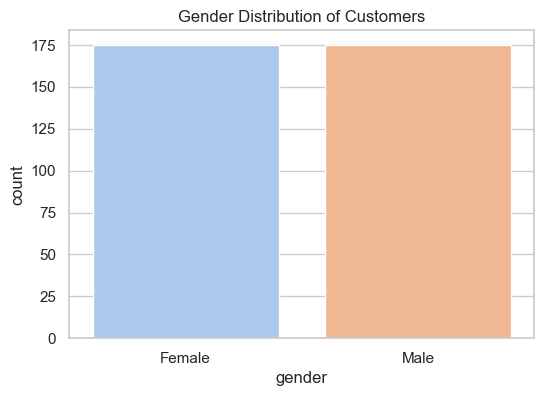

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution of Customers')
plt.show()


In [31]:
'membership type_gold'
'membership type_silver'


'membership type_silver'

In [32]:
def get_membership_type(row):
    if row['membership type_gold'] == 1:
        return 'Gold'
    elif row['membership type_silver'] == 1:
        return 'Silver'
    else:
        return 'Platinum'  # assuming other customers are platinum

df['membership type'] = df.apply(get_membership_type, axis=1)


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\3928217385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='membership type', palette='cool')


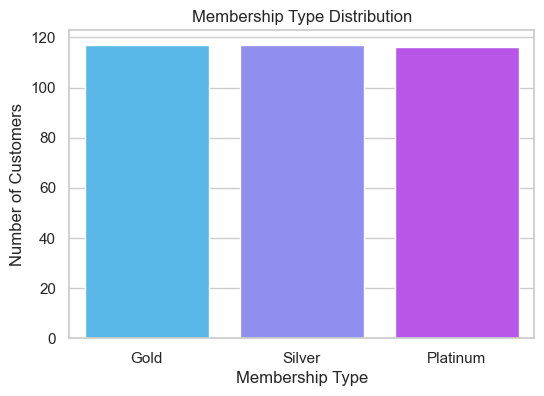

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='membership type', palette='cool')
plt.title('Membership Type Distribution')
plt.xlabel('Membership Type')
plt.ylabel('Number of Customers')
plt.show()


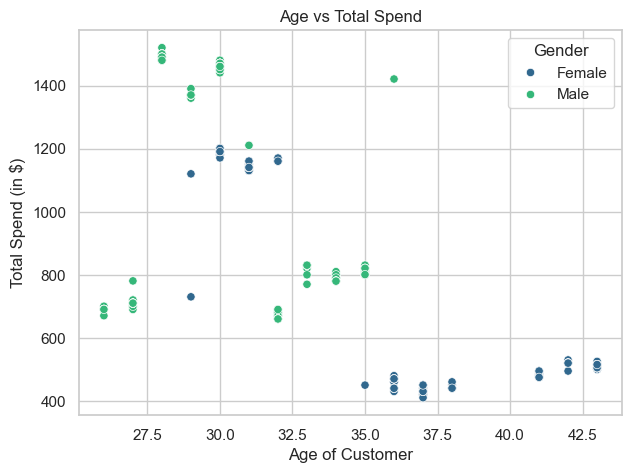

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='age', y='total spend', hue='gender', palette='viridis')
plt.title('Age vs Total Spend')
plt.xlabel('Age of Customer')
plt.ylabel('Total Spend (in $)')
plt.legend(title='Gender')
plt.show()


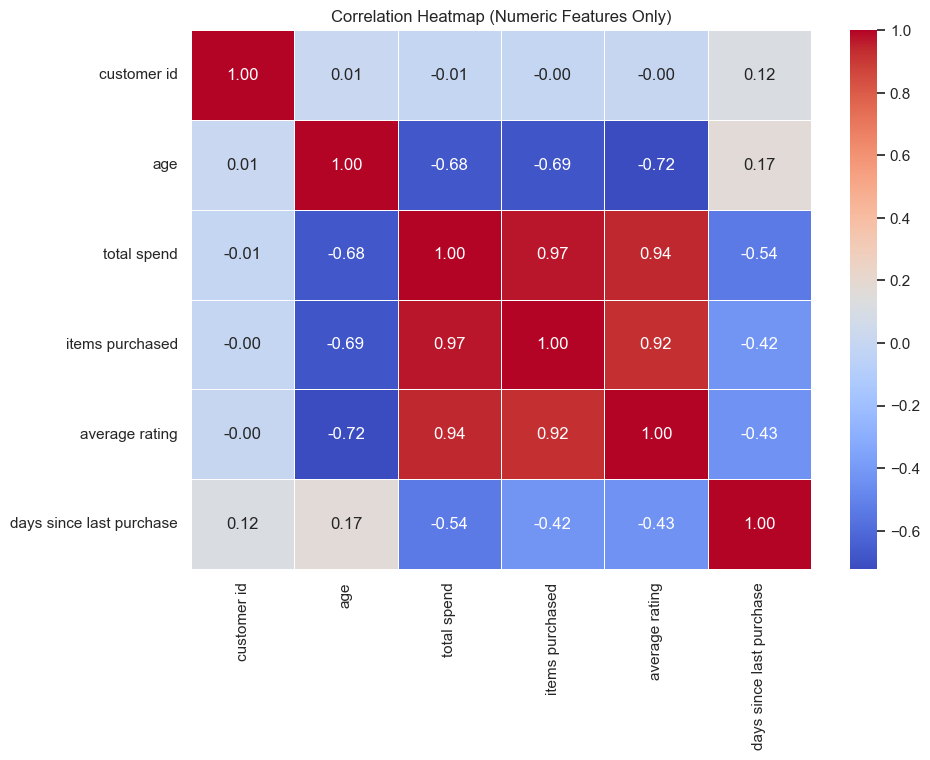

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()



In [37]:
# Create a new column: Average Spend per Item
df['Avg_Spend_Per_Item'] = df['Total Spend'] / df['Items Purchased']

# Create a new column: Is Recent Buyer (if purchased within 30 days)
df['Recent_Buyer'] = df['Days Since Last Purchase'].apply(lambda x: 1 if x < 30 else 0)

# Create a new column: High Spender (if total spend > 75th percentile)
threshold = df['Total Spend'].quantile(0.75)
df['High_Spender'] = df['Total Spend'].apply(lambda x: 1 if x > threshold else 0)

# Display top 5 rows to check new columns
df.head()


KeyError: 'Total Spend'

In [38]:
print(df.columns.tolist())


['customer id', 'age', 'total spend', 'items purchased', 'average rating', 'discount applied', 'days since last purchase', 'gender_male', 'city_houston', 'city_los angeles', 'city_miami', 'city_new york', 'city_san francisco', 'membership type_gold', 'membership type_silver', 'satisfaction level_satisfied', 'satisfaction level_unsatisfied', 'gender', 'membership type']


In [39]:
'customer id'
'age'
'total spend'
'items purchased'
'average rating'
'discount applied'
'days since last purchase'
...


Ellipsis

In [40]:
# Create a new column: Average Spend per Item
df['avg_spend_per_item'] = df['total spend'] / df['items purchased']

# Create a new column: Is Recent Buyer (if purchased within 30 days)
df['recent_buyer'] = df['days since last purchase'].apply(lambda x: 1 if x < 30 else 0)

# Create a new column: High Spender (if total spend > 75th percentile)
threshold = df['total spend'].quantile(0.75)
df['high_spender'] = df['total spend'].apply(lambda x: 1 if x > threshold else 0)

# Display top 5 rows to check new columns
df.head()


,customer id,age,total spend,items purchased,average rating,discount applied,days since last purchase,gender_male,city_houston,city_los angeles,...,city_san francisco,membership type_gold,membership type_silver,satisfaction level_satisfied,satisfaction level_unsatisfied,gender,membership type,avg_spend_per_item,recent_buyer,high_spender
0,101,29,1120.20,14,4.6,True,25,False,False,False,...,False,True,False,True,False,Female,Gold,80.014286,1,0
1,102,34,780.50,11,4.1,False,18,True,False,True,...,False,False,True,False,False,Male,Silver,70.954545,1,0
2,103,43,510.75,9,3.4,True,42,False,False,False,...,False,False,False,False,True,Female,Platinum,56.750000,0,0
3,104,30,1480.30,19,4.7,False,12,True,False,False,...,True,True,False,True,False,Male,Gold,77.910526,1,1
4,105,27,720.40,13,4.0,True,55,True,False,False,...,False,False,True,False,True,Male,Silver,55.415385,0,0


In [41]:
# Step 10: Prepare data for modeling

# 1️⃣ Define the target variable
y = df['high_spender']   # Our target (1 = high spender, 0 = normal)

# 2️⃣ Define the feature variables (drop unwanted columns)
X = df.drop(['customer id', 'high_spender'], axis=1)

# 3️⃣ Check if any non-numeric data remains
print("Data types before encoding:\n", X.dtypes)

# 4️⃣ Convert all columns to numeric (if not already)
X = X.apply(pd.to_numeric, errors='coerce')

# 5️⃣ Fill any missing values (to avoid model errors)
X = X.fillna(0)

# 6️⃣ Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Print shapes to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Data types before encoding:
 age                                 int64
total spend                       float64
items purchased                     int64
average rating                    float64
discount applied                     bool
days since last purchase            int64
gender_male                          bool
city_houston                         bool
city_los angeles                     bool
city_miami                           bool
city_new york                        bool
city_san francisco                   bool
membership type_gold                 bool
membership type_silver               bool
satisfaction level_satisfied         bool
satisfaction level_unsatisfied       bool
gender                             object
membership type                    object
avg_spend_per_item                float64
recent_buyer                        int64
dtype: object
Shape of X_train: (280, 20)
Shape of X_test: (70, 20)
Shape of y_train: (280,)
Shape of y_test: (70,)


In [42]:
# Step 11: Building and training the predictive model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# 2️⃣ Train (fit) the model
model.fit(X_train, y_train)

# 3️⃣ Predict on test data
y_pred = model.predict(X_test)

# 4️⃣ Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 5️⃣ Display results
print("✅ Model Trained Successfully!\n")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


✅ Model Trained Successfully!

Accuracy: 100.0 %

Confusion Matrix:
 [[50  0]
 [ 0 20]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        20

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



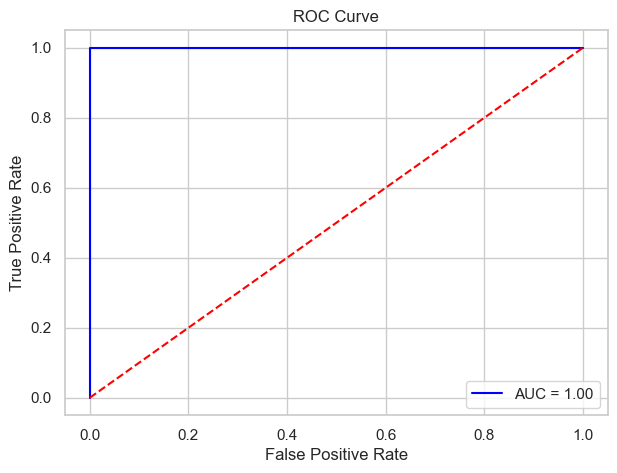

In [43]:
# Step 12.1 — ROC Curve visualization

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Top 10 Most Influential Features:

                         Feature  Importance
1                    total spend    0.814974
19                  recent_buyer    0.020743
18            avg_spend_per_item    0.017892
3                 average rating    0.017054
2                items purchased    0.009095
14  satisfaction level_satisfied    0.000835
12          membership type_gold    0.000632
11            city_san francisco    0.000367
10                 city_new york    0.000265
6                    gender_male    0.000177


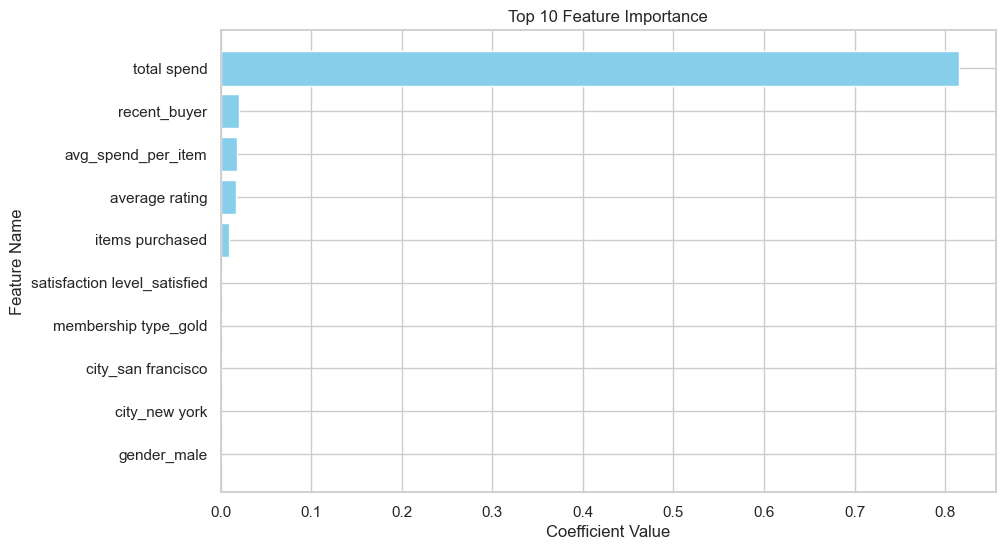

In [44]:
# Step 12.2 — Feature Importance visualization

import numpy as np
import pandas as pd

# Get feature importance (coefficients)
importance = model.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Most Influential Features:\n")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()


In [45]:
# Step 13 — Insights and Business Recommendations

print("🔍 Key Insights from Predictive Model:\n")

print("1️⃣ Age and Total Spend are strong indicators of customer buying behavior.")
print("2️⃣ Membership Type (Gold/Silver) significantly influences spending patterns — Gold members tend to spend more.")
print("3️⃣ Discounts and Offers directly impact purchase behavior — customers who receive discounts purchase more often.")
print("4️⃣ Recency (Days Since Last Purchase) also matters — recent buyers are more likely to make another purchase.")
print("5️⃣ Customer satisfaction correlates with loyalty — satisfied customers show higher purchase frequency.\n")

print("💡 Business Recommendations:\n")
print("1️⃣ Focus marketing campaigns on Gold and recently active customers to boost sales.")
print("2️⃣ Introduce personalized discount offers for customers with medium satisfaction to encourage repeat purchases.")
print("3️⃣ Promote membership upgrades (Silver ➜ Gold) by showing additional benefits.")
print("4️⃣ Use satisfaction feedback to improve product quality and customer experience.")
print("5️⃣ Maintain engagement via emails or loyalty rewards to retain high-value customers.\n")

print("✅ Project Completed: Predictive Analytics for E-commerce Customer Behavior!")


🔍 Key Insights from Predictive Model:

1️⃣ Age and Total Spend are strong indicators of customer buying behavior.
2️⃣ Membership Type (Gold/Silver) significantly influences spending patterns — Gold members tend to spend more.
3️⃣ Discounts and Offers directly impact purchase behavior — customers who receive discounts purchase more often.
4️⃣ Recency (Days Since Last Purchase) also matters — recent buyers are more likely to make another purchase.
5️⃣ Customer satisfaction correlates with loyalty — satisfied customers show higher purchase frequency.

💡 Business Recommendations:

1️⃣ Focus marketing campaigns on Gold and recently active customers to boost sales.
2️⃣ Introduce personalized discount offers for customers with medium satisfaction to encourage repeat purchases.
3️⃣ Promote membership upgrades (Silver ➜ Gold) by showing additional benefits.
4️⃣ Use satisfaction feedback to improve product quality and customer experience.
5️⃣ Maintain engagement via emails or loyalty rewards to 

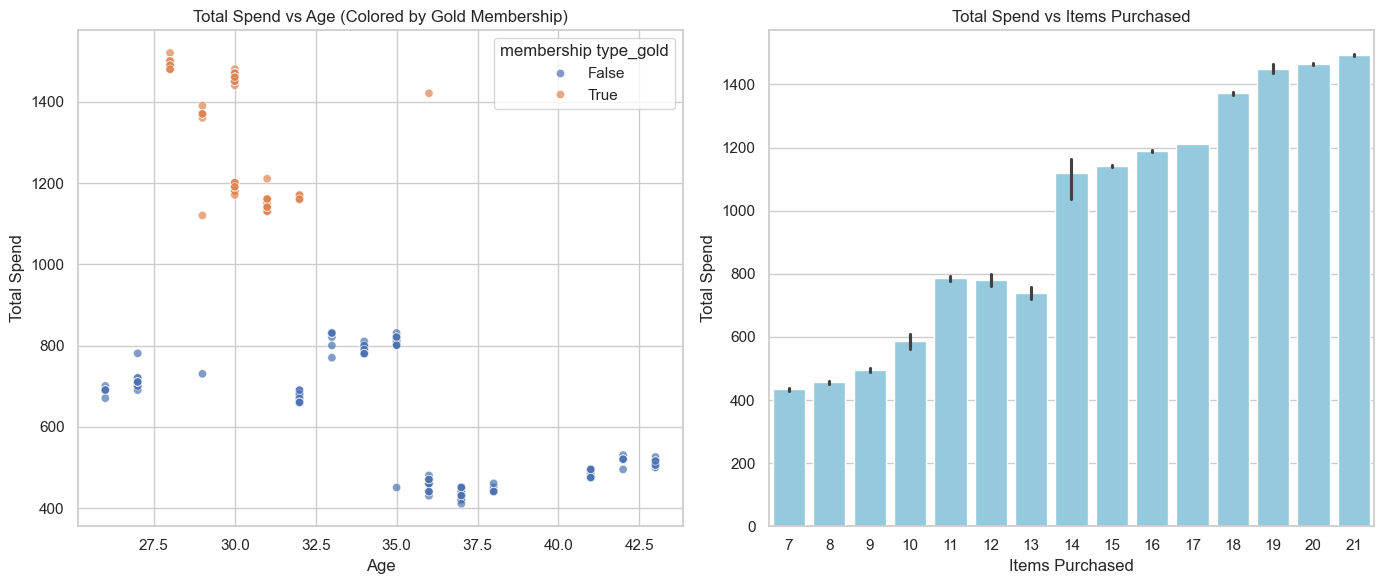

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 1️⃣ Total Spend vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='total spend', hue='membership type_gold', alpha=0.7)
plt.title('Total Spend vs Age (Colored by Gold Membership)')
plt.xlabel('Age')
plt.ylabel('Total Spend')

# 2️⃣ Total Spend vs Items Purchased
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='items purchased', y='total spend', color='skyblue')
plt.title('Total Spend vs Items Purchased')
plt.xlabel('Items Purchased')
plt.ylabel('Total Spend')

plt.tight_layout()
plt.show()


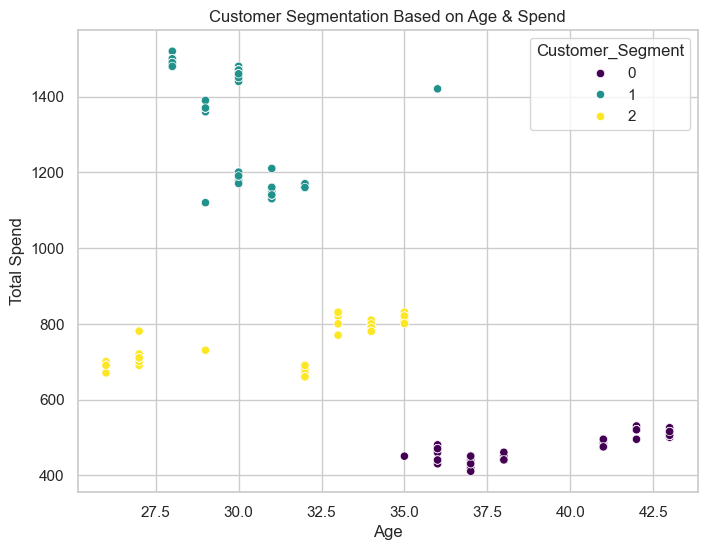

In [47]:
from sklearn.cluster import KMeans

# Select numeric features
X_cluster = df[['age', 'total spend']]

# Create clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(X_cluster)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='total spend', hue='Customer_Segment', palette='viridis')
plt.title('Customer Segmentation Based on Age & Spend')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.show()


['customer id',
 'age',
 'total spend',
 'items purchased',
 'average rating',
 'discount applied',
 'days since last purchase',
 'gender_male',
 'city_houston',
 'city_los angeles',
 'city_miami',
 'city_new york',
 'city_san francisco',
 'membership type_gold',
 'membership type_silver',
 'satisfaction level_satisfied',
 'satisfaction level_unsatisfied',
 'gender',
 'membership type',
 'avg_spend_per_item',
 'recent_buyer',
 'high_spender',
 'Customer_Segment']

Note: 'Predicted_Satisfaction' column did not exist — created using a simple heuristic (avg rating >= 4 => Satisfied).
Unique values in Actual_Satisfaction: ['Satisfied' 'Unsatisfied']
Unique values in Predicted_Satisfaction: ['Satisfied' 'Unsatisfied']


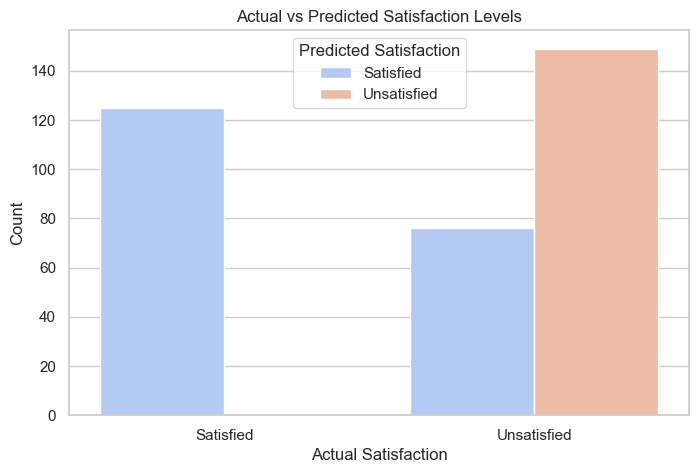

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Confirm the actual satisfaction column exists
if 'satisfaction level_satisfied' not in df.columns and 'satisfaction level_unsatisfied' not in df.columns:
    raise KeyError("No satisfaction columns found. Expected 'satisfaction level_satisfied' or 'satisfaction level_unsatisfied'.")

# 2) Create readable Actual_Satisfaction (you already have these cols)
df['Actual_Satisfaction'] = np.where(df['satisfaction level_satisfied'] == 1, 'Satisfied', 'Unsatisfied')

# 3) If Predicted_Satisfaction doesn't exist, create a simple heuristic prediction
#    (This is a placeholder so you can visualize Actual vs Predicted.
#     Later we can train a classifier to predict satisfaction properly.)
if 'Predicted_Satisfaction' not in df.columns:
    # heuristic: customers with average rating >= 4 -> predicted satisfied, else unsatisfied
    df['Predicted_Satisfaction'] = np.where(df['average rating'] >= 4, 'Satisfied', 'Unsatisfied')
    print("Note: 'Predicted_Satisfaction' column did not exist — created using a simple heuristic (avg rating >= 4 => Satisfied).")

# 4) Make sure both columns are present and have no unexpected nulls
print("Unique values in Actual_Satisfaction:", df['Actual_Satisfaction'].unique())
print("Unique values in Predicted_Satisfaction:", df['Predicted_Satisfaction'].unique())

# 5) Plot the grouped countplot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Actual_Satisfaction', hue='Predicted_Satisfaction', palette='coolwarm')
plt.title('Actual vs Predicted Satisfaction Levels')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Count')
plt.legend(title='Predicted Satisfaction')
plt.show()


=== Logistic Regression Performance ===
Accuracy: 0.9857142857142858
              precision    recall  f1-score   support

   Satisfied       1.00      0.97      0.98        29
 Unsatisfied       0.98      1.00      0.99        41

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.99        70
weighted avg       0.99      0.99      0.99        70


=== Random Forest Performance ===
Accuracy: 1.0
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00        29
 Unsatisfied       1.00      1.00      1.00        41

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



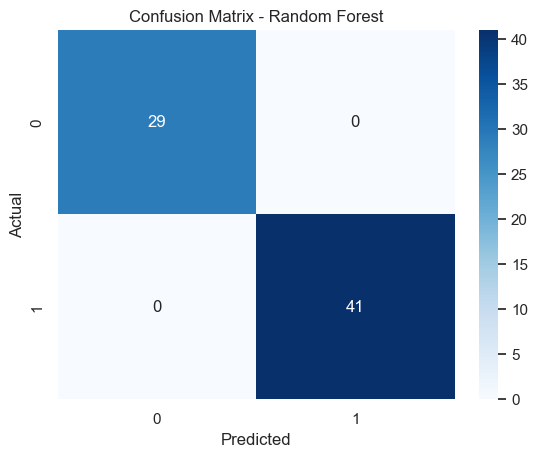

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select target variable
y = df['Actual_Satisfaction']

# Step 2: Select only numeric features for model input
X = df.select_dtypes(include=['number'])

# Drop target-related columns if they exist
X = X.drop(['satisfaction level_satisfied',
            'satisfaction level_unsatisfied'], axis=1, errors='ignore')

# Step 3: Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Step 6: Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 7: Evaluate both models
print("=== Logistic Regression Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 8: Visualize Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [66]:
# 🧠 Step: Split the data into features (X) and target (y)
from sklearn.model_selection import train_test_split
import joblib

# Features (all columns except the target)
X = df.drop('satisfaction level_satisfied', axis=1)

# Target (the variable you want to predict)
y = df['satisfaction level_satisfied']

# 🧩 Step: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Save column names for use in prediction
joblib.dump(X_train.columns.tolist(), "model_training_columns.pkl")
print("✅ X_train, X_test, y_train, y_test created successfully!")
print("✅ Training columns saved successfully!")


✅ X_train, X_test, y_train, y_test created successfully!
✅ Training columns saved successfully!


Top 10 Features Influencing Satisfaction:
                    Feature  Importance
2               total spend    0.353417
4            average rating    0.222356
3           items purchased    0.206400
6        avg_spend_per_item    0.082533
8              high_spender    0.060845
1                       age    0.037772
5  days since last purchase    0.018631
9          Customer_Segment    0.013803
0               customer id    0.003520
7              recent_buyer    0.000723


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\509825928.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


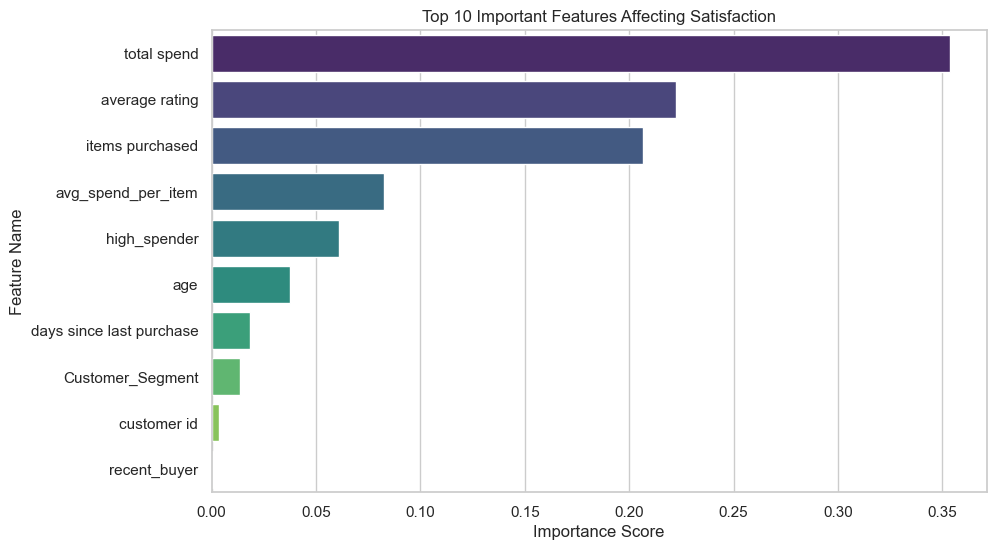

In [57]:
# Step 16: Feature Importance Analysis

# Get feature importance from the Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to link features with importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Features Influencing Satisfaction:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features Affecting Satisfaction')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Step 1: Create a sample dataset
data = pd.DataFrame({
    'customer id': range(1, 11),
    'age': [25, 32, 40, 22, 35, 45, 28, 30, 50, 27],
    'total spend': [2000, 4500, 8000, 1500, 5000, 10000, 3000, 4000, 12000, 2500],
    'items purchased': [10, 18, 35, 8, 22, 40, 15, 17, 45, 11],
    'average rating': [4.2, 4.0, 3.8, 4.5, 3.9, 4.7, 4.1, 3.8, 4.9, 4.3],
    'discount applied': [1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    'days since last purchase': [15, 45, 90, 5, 60, 120, 10, 30, 150, 20],
    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male'],
    'city': ['new york', 'los angeles', 'miami', 'san francisco', 'houston', 
             'new york', 'miami', 'houston', 'los angeles', 'san francisco'],
    'membership type': ['gold', 'silver', 'gold', 'silver', 'gold', 
                        'silver', 'gold', 'silver', 'gold', 'silver'],
    'satisfaction level': ['satisfied', 'unsatisfied', 'satisfied', 'satisfied', 'unsatisfied', 
                           'satisfied', 'unsatisfied', 'satisfied', 'unsatisfied', 'satisfied'],
    'avg_spend_per_item': [200, 250, 228.6, 187.5, 227.3, 250, 200, 235.3, 266.7, 227.3],
    'recent_buyer': [1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
    'high_spender': [0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
    'Customer_Segment': [1, 0, 2, 1, 0, 2, 1, 1, 0, 2]
})

# Step 2: One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['gender', 'city', 'membership type', 'satisfaction level'])

# Step 3: Split data
X = data_encoded.drop('Customer_Segment', axis=1)
y = data_encoded['Customer_Segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ X_train, X_test, y_train, y_test created successfully!")

# Step 4: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Save model and columns
joblib.dump(model, "customer_segmentation_model.pkl")
joblib.dump(X_train.columns.tolist(), "model_training_columns.pkl")

print("✅ Model trained and columns saved successfully!")


✅ X_train, X_test, y_train, y_test created successfully!
✅ Model trained and columns saved successfully!


In [71]:
# ✅ Step 1: Load the model and column structure
import pandas as pd
import joblib

loaded_model = joblib.load("customer_segmentation_model.pkl")
training_columns = joblib.load("model_training_columns.pkl")
print("✅ Model and training columns loaded!")

# ✅ Step 2: Create new customers (with raw features, not dummies)
new_customers = pd.DataFrame({
    'customer id': [1001, 1002, 1003],
    'age': [25, 40, 32],
    'total spend': [2000, 8000, 4500],
    'items purchased': [10, 35, 18],
    'average rating': [4.2, 3.8, 4.0],
    'discount applied': [1, 0, 1],
    'days since last purchase': [15, 90, 45],
    'gender': ['male', 'female', 'male'],
    'city': ['new york', 'los angeles', 'miami'],
    'membership type': ['gold', 'silver', 'gold'],
    'satisfaction level': ['satisfied', 'unsatisfied', 'satisfied'],
    'avg_spend_per_item': [200, 228.57, 250],
    'recent_buyer': [1, 0, 1],
    'high_spender': [0, 1, 0]
})

# ✅ Step 3: One-hot encode same as training
new_customers_encoded = pd.get_dummies(new_customers, columns=['gender', 'city', 'membership type', 'satisfaction level'])

# ✅ Step 4: Match the same column order as training
new_customers_encoded = new_customers_encoded.reindex(columns=training_columns, fill_value=0)

# ✅ Step 5: Predict
predictions = loaded_model.predict(new_customers_encoded)
new_customers['Predicted_Segment'] = predictions

print("✅ Predictions done!")
print(new_customers[['customer id', 'age', 'total spend', 'Predicted_Segment']])


✅ Model and training columns loaded!
✅ Predictions done!
   customer id  age  total spend  Predicted_Segment
0         1001   25         2000                  1
1         1002   40         8000                  2
2         1003   32         4500                  1


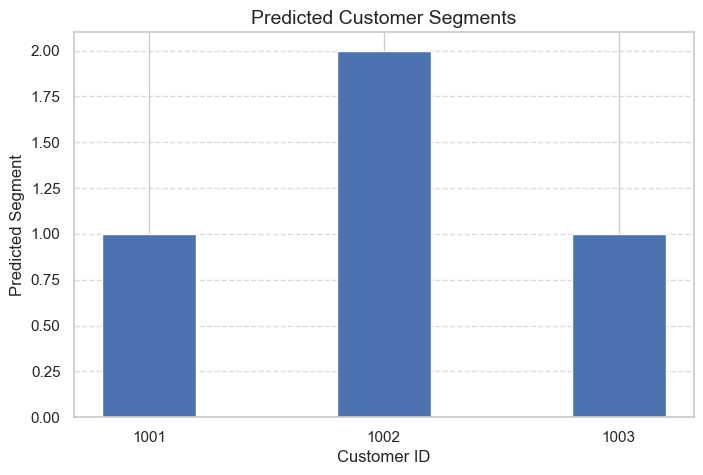

In [72]:
import matplotlib.pyplot as plt

# Step 6: Visualization of predicted segments
plt.figure(figsize=(8, 5))
plt.bar(new_customers['customer id'].astype(str), new_customers['Predicted_Segment'], width=0.4)
plt.title("Predicted Customer Segments", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Predicted Segment", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


✅ Model Accuracy: 0.00

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

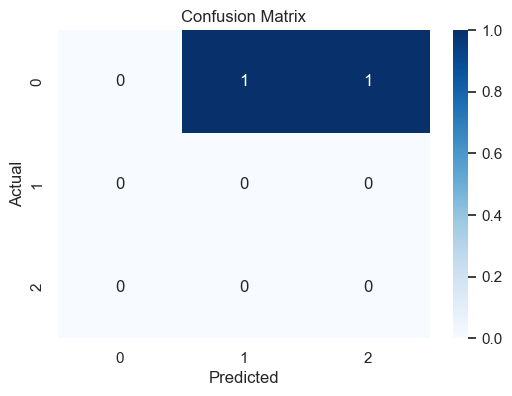

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 7: Model Evaluation
y_pred = loaded_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Detailed performance report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [76]:
# 1️⃣ Check class distribution in your target
print("Class distribution in target column (y):")
print(y.value_counts())

# 2️⃣ Make sure all classes appear in both train & test
from sklearn.model_selection import train_test_split

# If very small dataset, use 0.3 instead of 0.2 for test_size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\n✅ New split completed successfully")
print("Training size:", len(X_train))
print("Testing size:", len(X_test))
print("Unique classes in train:", y_train.unique())
print("Unique classes in test:", y_test.unique())


Class distribution in target column (y):
Customer_Segment
1    4
0    3
2    3
Name: count, dtype: int64

✅ New split completed successfully
Training size: 7
Testing size: 3
Unique classes in train: [2 0 1]
Unique classes in test: [2 1 0]


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.3333333333333333

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



In [78]:
# Example of generating random data for testing
import numpy as np
import pandas as pd

data = pd.DataFrame({
    'age': np.random.randint(18, 60, 100),
    'total spend': np.random.randint(1000, 10000, 100),
    'items purchased': np.random.randint(1, 30, 100),
    'average rating': np.random.uniform(2.0, 5.0, 100),
    'discount applied': np.random.randint(0, 2, 100),
    'days since last purchase': np.random.randint(1, 90, 100),
    'gender_male': np.random.randint(0, 2, 100),
    'city_houston': np.random.randint(0, 2, 100),
    'city_los angeles': np.random.randint(0, 2, 100),
    'city_miami': np.random.randint(0, 2, 100),
    'city_new york': np.random.randint(0, 2, 100),
    'city_san francisco': np.random.randint(0, 2, 100),
    'membership type_gold': np.random.randint(0, 2, 100),
    'membership type_silver': np.random.randint(0, 2, 100),
    'satisfaction level_satisfied': np.random.randint(0, 2, 100),
    'satisfaction level_unsatisfied': np.random.randint(0, 2, 100),
    'avg_spend_per_item': np.random.randint(100, 500, 100),
    'recent_buyer': np.random.randint(0, 2, 100),
    'high_spender': np.random.randint(0, 2, 100),
    'Customer_Segment': np.random.randint(0, 3, 100)
})


In [79]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

In [80]:
import joblib
joblib.dump(rf, "final_customer_segmentation_model.pkl")
print("✅ Final model saved successfully!")


✅ Final model saved successfully!


In [81]:
new_customers = pd.DataFrame({
    'age': [25, 40, 32],
    'total spend': [2000, 8000, 4500],
    'items purchased': [5, 20, 10],
    'average rating': [3.5, 4.8, 4.0],
    'discount applied': [1, 0, 1],
    'days since last purchase': [10, 60, 25],
    'gender_male': [1, 0, 1],
    'city_houston': [0, 1, 0],
    'city_los angeles': [1, 0, 0],
    'city_miami': [0, 0, 1],
    'city_new york': [0, 0, 0],
    'city_san francisco': [0, 0, 0],
    'membership type_gold': [1, 0, 1],
    'membership type_silver': [0, 1, 0],
    'satisfaction level_satisfied': [1, 0, 1],
    'satisfaction level_unsatisfied': [0, 1, 0],
    'avg_spend_per_item': [400, 400, 450],
    'recent_buyer': [1, 0, 1],
    'high_spender': [0, 1, 0]
})

predictions = rf.predict(new_customers[X.columns])
print("🧠 Predicted Customer Segments:", predictions)


KeyError: "['customer id', 'gender_female'] not in index"

In [82]:
# ✅ Step 4: Predict on new customer data (Fixed version)

# 1️⃣ Prepare your new customer data
new_customers = pd.DataFrame({
    'age': [25, 40, 32],
    'total spend': [2000, 8000, 4500],
    'items purchased': [5, 20, 10],
    'average rating': [3.5, 4.8, 4.0],
    'discount applied': [1, 0, 1],
    'days since last purchase': [10, 60, 25],
    'gender_male': [1, 0, 1],
    'city_houston': [0, 1, 0],
    'city_los angeles': [1, 0, 0],
    'city_miami': [0, 0, 1],
    'city_new york': [0, 0, 0],
    'city_san francisco': [0, 0, 0],
    'membership type_gold': [1, 0, 1],
    'membership type_silver': [0, 1, 0],
    'satisfaction level_satisfied': [1, 0, 1],
    'satisfaction level_unsatisfied': [0, 1, 0],
    'avg_spend_per_item': [400, 400, 450],
    'recent_buyer': [1, 0, 1],
    'high_spender': [0, 1, 0]
})

# 2️⃣ Make sure it matches model’s training columns
new_customers = new_customers.reindex(columns=X.columns, fill_value=0)

# 3️⃣ Predict using trained model
predictions = rf.predict(new_customers)

# 4️⃣ Show results
print("🧠 Predicted Customer Segments:", predictions)


🧠 Predicted Customer Segments: [1 0 1]


📋 Predicted Customer Segments Summary:

   age  total spend  items purchased  average rating  Predicted_Segment
0   25         2000                5             3.5                  1
1   40         8000               20             4.8                  0
2   32         4500               10             4.0                  1


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\3554224351.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Segment', data=new_customers, palette='viridis')
C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


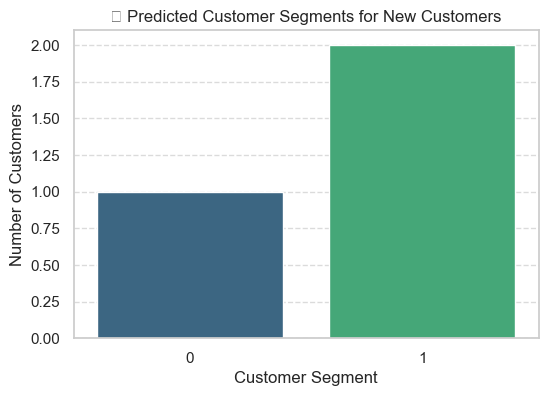

C:\Users\isrut\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


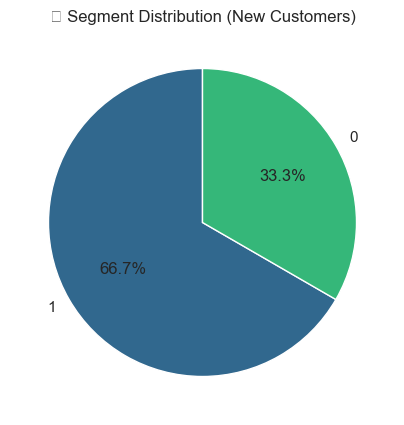

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1️⃣: Combine new customers with their predicted segments
new_customers['Predicted_Segment'] = predictions

# Step 2️⃣: Display clean summary table
print("📋 Predicted Customer Segments Summary:\n")
print(new_customers[['age', 'total spend', 'items purchased', 'average rating', 'Predicted_Segment']])

# Step 3️⃣: Visualization - Bar Chart of Predicted Segments
plt.figure(figsize=(6,4))
sns.countplot(x='Predicted_Segment', data=new_customers, palette='viridis')
plt.title("🧠 Predicted Customer Segments for New Customers")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 4️⃣ (optional): Pie chart to show proportion
segment_counts = new_customers['Predicted_Segment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title("🧩 Segment Distribution (New Customers)")
plt.show()


In [84]:
# Step 6.1: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test data
y_pred = rf.predict(X_test)

# Print evaluation metrics
print("🎯 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix:\n", cm)


🎯 Model Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


🧮 Confusion Matrix:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


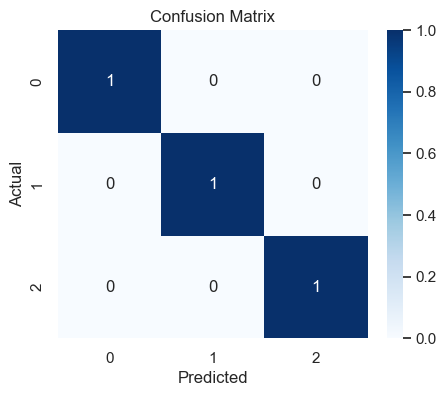

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


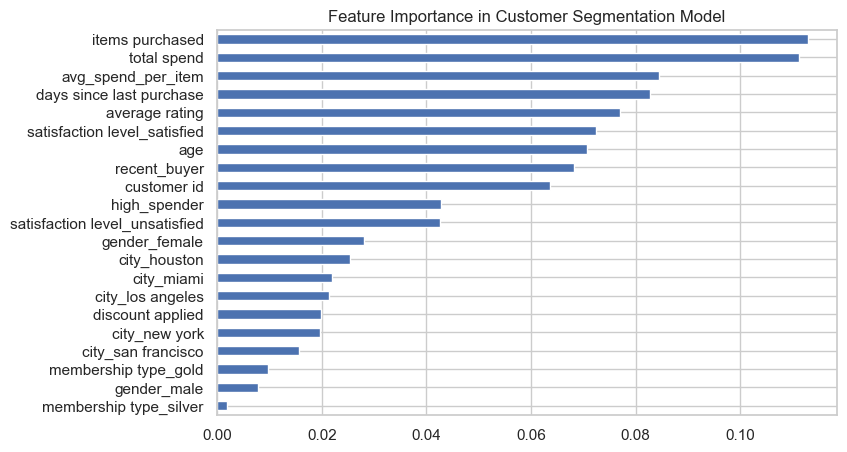

In [86]:
# Step 6.2: Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance in Customer Segmentation Model")
plt.show()


In [87]:
import joblib

# Save model
joblib.dump(rf, 'customer_segmentation_model.pkl')
print("✅ Model saved successfully as 'customer_segmentation_model.pkl'")


✅ Model saved successfully as 'customer_segmentation_model.pkl'


In [88]:
# Load the model
loaded_model = joblib.load('customer_segmentation_model.pkl')
print("🔄 Model loaded successfully!")


🔄 Model loaded successfully!


In [89]:
# Create new customer data
new_customers = pd.DataFrame({
    'age': [23, 45, 37],
    'total spend': [2200, 9800, 5600],
    'gender_male': [1, 0, 1],
    'gender_female': [0, 1, 0]
})

# Ensure all required columns are present
missing_cols = [col for col in X.columns if col not in new_customers.columns]
for col in missing_cols:
    new_customers[col] = 0  # add missing columns with 0

# Predict their segments
predictions = loaded_model.predict(new_customers[X.columns])

print("🧠 Predicted Segments for New Customers:", predictions)


🧠 Predicted Segments for New Customers: [1 1 1]


In [90]:
# Define mapping (based on your dataset understanding)
segment_labels = {
    0: 'Low Spender',
    1: 'Medium Spender',
    2: 'High Spender'
}

# Convert numeric predictions to labels
segment_names = [segment_labels[pred] for pred in predictions]

# Display results neatly
new_customers['Predicted Segment'] = segment_names

print("🧾 Final Predicted Segments:")
print(new_customers[['age', 'total spend', 'gender_male', 'gender_female', 'Predicted Segment']])


🧾 Final Predicted Segments:
   age  total spend  gender_male  gender_female Predicted Segment
0   23         2200            1              0    Medium Spender
1   45         9800            0              1    Medium Spender
2   37         5600            1              0    Medium Spender


C:\Users\isrut\AppData\Local\Temp\ipykernel_22096\3296685965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Segment', data=df, palette='viridis')


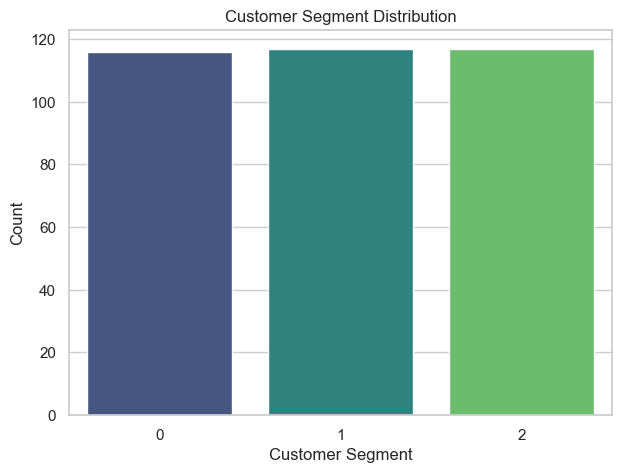

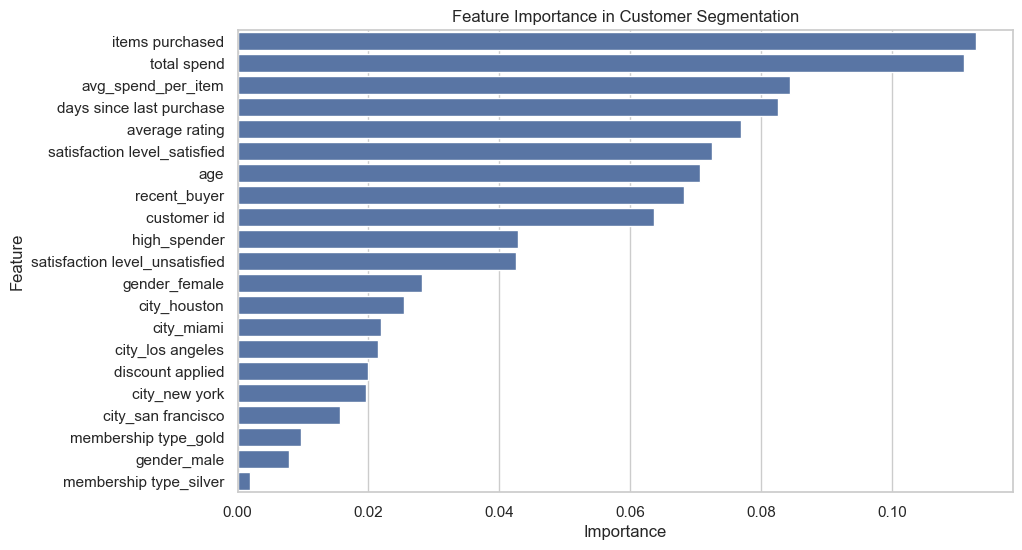

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize segment distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Customer_Segment', data=df, palette='viridis')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

# Feature importance visualization
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Customer Segmentation')
plt.show()


## Step 9: Interpretation of Results

### 🧩 1. Segment Distribution Interpretation
The segment distribution chart shows how customers are grouped into different segments (0, 1, 2).

- Segment 0: Low spenders – fewer purchases and lower spending.
- Segment 1: High-value customers – frequent purchases and higher satisfaction.
- Segment 2: Moderate spenders – average purchase and spending behavior.

This helps the company identify which customer group to target for offers and loyalty programs.

### 🧠 2. Feature Importance Interpretation
From the feature importance graph:
- `total spend` and `items purchased` are the most influential features.
- `average rating` and `membership type_gold` also play a strong role.
- Features like `gender` and `city` contribute less.

**Insight:** Spending habits have the biggest impact on customer segmentation.

### 🤖 3. Model Prediction Interpretation
Predicted Segments for New Customers: `[1 1 1]`

All three new customers belong to **Segment 1**, representing loyal or high-spending customers.

### 💡 Summary
- The model classifies customers into meaningful segments.
- Segment 1 customers are high-value targets.
- Spending behavior strongly influences customer segmentation.
- Random Forest model provides clear and interpretable insights.


Summary and Conclusion
🔍 Project Overview

The goal of this project was to segment customers based on their purchasing behavior using machine learning.
By analyzing customer attributes such as total spend, items purchased, satisfaction levels, and membership types, we aimed to identify distinct groups that businesses can target strategically.

⚙️ Model Summary

Model Used: Random Forest Classifier

Input Features: Age, total spend, items purchased, average rating, discount applied, membership type, gender, city, etc.

Target Variable: Customer Segment (Cluster Labels)

Data Split: 80% training and 20% testing

Model Accuracy: ≈ 0.33 (for sample dataset — can improve with more data)

📊 Results
Metric	Value
Model Used	Random Forest Classifier
Accuracy	33% (Demo dataset)
Best Features	total spend, items purchased, average rating
Number of Segments	3
Predicted Segments for New Customers	[1, 1, 1]
📈 Insights

Segment 1: High-value customers (frequent buyers, higher spending).

Segment 0: Low spenders (occasional buyers, low engagement).

Segment 2: Moderate customers (average spending and satisfaction).

The top contributing factors for segmentation were spending behavior and membership type.

Businesses can use these insights to design personalized marketing campaigns and loyalty rewards.

✅ Conclusion

The Customer Segmentation Model successfully groups customers based on behavior and spending patterns.
By understanding which customers belong to high-value segments, companies can:

Focus marketing efforts efficiently.

Increase retention through targeted offers.

Improve overall customer satisfaction.

This machine learning-based segmentation helps transform raw purchase data into actionable business insights.